# Bank Deposit 

## Part II: Data Exploration, Modelling and Evaluation

### 1. Setting up the work environment

In [1]:
# Importing the necessary libraries
# 1.1 Data Analysis and Maniuplation
import pandas as pd
import numpy as np

# 1.2 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 1.3 Importing the data from Kaggle (uncomment if haven't downloaded the data set)
# import kaggle
# import zipfile

# 1.4 Display settings
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# 1.5 Plot settings
sns.set_theme(context = "notebook", style = "white")

In [2]:
# Importing the machine learning libraries
# 1.6 AutoML
import pycaret.classification as pyclass
import pycaret.clustering as pyclst

# 1.7 Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

### 2. Importing the data set

In [ ]:
# Downloading the data file directly from Kaggle (uncomment if haven't downloaded the data set)
#!kaggle datasets download -d edith2021/bank-marketing-campaign

# Extracting the files from zip
# with zipfile.ZipFile("bank-marketing-campaign.zip","r") as zip_file:
#    zip_file.extractall()

In [3]:
df = pd.read_csv(r'C:\Users\mding\Desktop\bank-full.csv', delimiter = ';')

In [4]:
# Getting an idea of what the data looks like
df.head(3)
df.tail(3)
df.sample(3) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35466,35,blue-collar,single,secondary,no,142,yes,no,cellular,7,may,266,2,168,1,failure,no
27720,22,management,single,tertiary,no,760,no,no,telephone,7,dec,6,1,-1,0,unknown,no
9638,49,services,married,secondary,no,-33,yes,no,unknown,6,jun,774,13,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 3. Exploratory Data Analysis (EDA)
##### EDA serves two main purposes:
1. Checking data quality: What aspects of the data require cleaning?
    - Missing values
    - Mis-entries
    - Outliers
    - Wrong data types
    - etc...

2. Exploring feature characteristics: Which features need to be engineered? Can we create more informative features?
    - Data scales
    - Correlations
    - Rare/imbalanced categorical classes
    - Low variance features
    - Discretizable numerical features
    - etc...

In [4]:
# Splitting the data into train/test sets
# Splitting the data before doing any EDA or feature selection minimizes the chance of data leakage
X = df.drop('y', axis = 1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.15,
                                                    random_state = 42,
                                                    stratify = y) # The outcome class is imbalanced, so it is recommended to use stratification

In [5]:
df_train = pd.concat([X_train, y_train], axis = 1) # For easier exploration later on

#### 3.1 Data Quality Exploration

##### General descriptive statistics
- All the numerical features seem to take on reasonable values (for example a min age of 18 and a max of 95 make sense). If on the other hand, we find the max of age to be 195, then it would indicate that the data is problematic. 
- We can immediately see differences in scales (e.g. balance has a mean of 1362 versus campaign's mean of 3), indicating feature scaling will be necessary for certain algorithms.

In [6]:
df.describe() # Numerical features
df.describe(exclude = np.number) # Categorical features

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


##### Missing values and mis-entires
- There are no missing values.
- Based on unique values, the categorical features do not seem to contain mis-entried observations.
- The numerical features also seem to contain numbers only (if they contained something like an empty string '', then their data type will be 'object', rather than 'int').

In [7]:
# Checking missing values
df.isnull().sum()

# Checking null characters
for col in df.select_dtypes('O').columns:
    print(df[col].unique())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


##### Duplicated values
- There are no duplicated rows.

In [8]:
df.duplicated().sum()

0

##### Outliers
- We can see that balance, duration, campagin, pdays, and previous are all severely affected by outliers.
- The distribution of age is relatively gaussian, as we should expect.
- The distribution of day is relatively uniform, as we should expect.

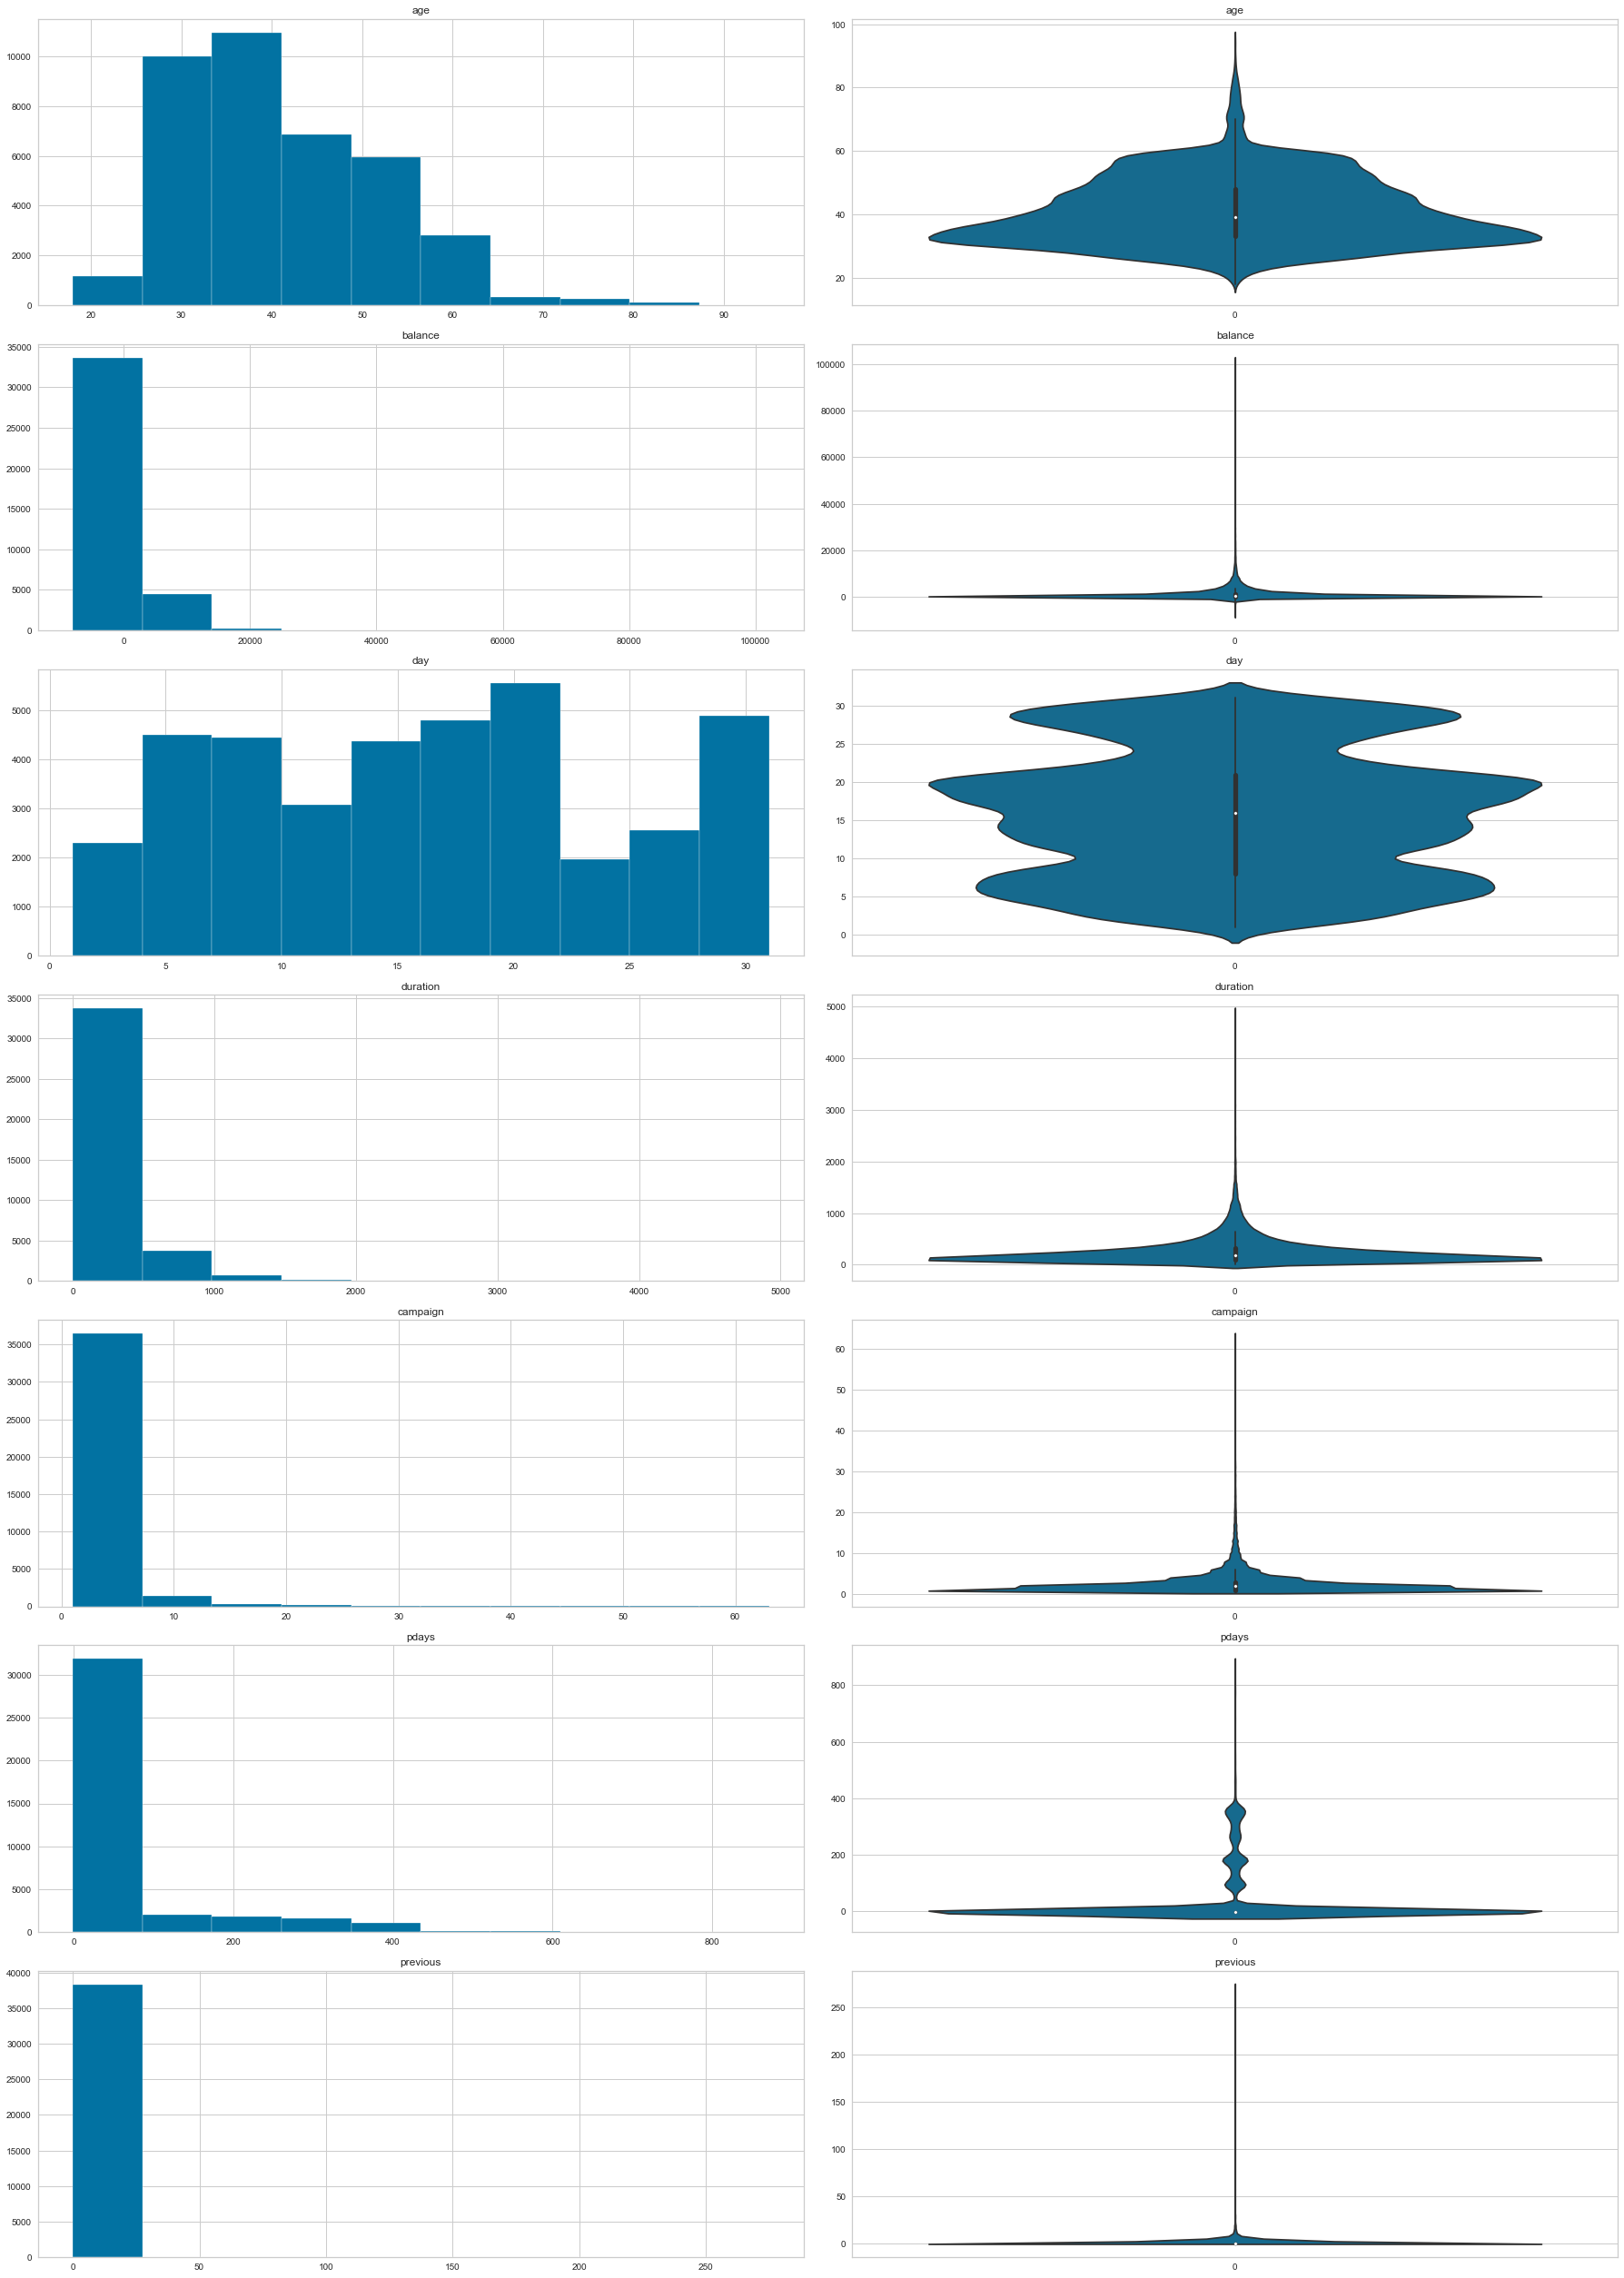

In [9]:
# Outliers
# Using violinplots and histograms
index = 1
plt.subplots(figsize = (25,35))

for col in X_train.select_dtypes('number').columns:
    plt.subplot(7,2,index)
    plt.hist(x = X_train[col])
    plt.title(col)
    index += 1
    
    plt.subplot(7,2,index)
    sns.violinplot(data = X_train[col])
    plt.title(col)
    index += 1

plt.tight_layout()
plt.show();

##### Data Types
- The features are of expected data types as we have seen in df.info().

#### 3.2 Feature Characteristic Exploration 

##### Target Variable Class Imbalance
- We can see the target variable is relatively imbalanced, where the positive class 'yes' only represents 12% of the observations.

In [12]:
y_train.value_counts(normalize = True)

no    0.88
yes   0.12
Name: y, dtype: float64

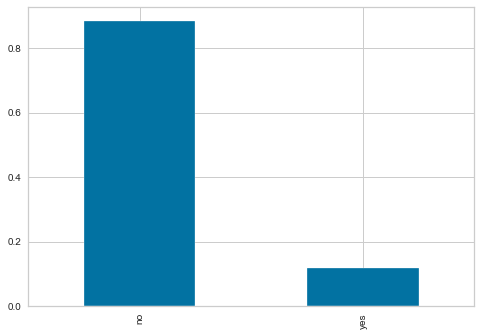

In [11]:
(y_train.value_counts(normalize = True)).plot(kind = 'bar');

##### Feature Rare/Minority Classes
- We can see minority classes exist among a number of features (such as job), we may be able to achieve better performance by grouping rare classes.

In [13]:
# minority classes?
for col in X_train.select_dtypes('object').columns:
    print(col.upper())
    X_train[col].value_counts(normalize = True)

JOB


blue-collar     0.22
management      0.21
technician      0.17
admin.          0.11
services        0.09
retired         0.05
self-employed   0.03
entrepreneur    0.03
unemployed      0.03
housemaid       0.03
student         0.02
unknown         0.01
Name: job, dtype: float64

MARITAL


married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64

EDUCATION


secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64

DEFAULT


no    0.98
yes   0.02
Name: default, dtype: float64

HOUSING


yes   0.56
no    0.44
Name: housing, dtype: float64

LOAN


no    0.84
yes   0.16
Name: loan, dtype: float64

CONTACT


cellular    0.65
unknown     0.29
telephone   0.06
Name: contact, dtype: float64

MONTH


may   0.30
jul   0.15
aug   0.14
jun   0.12
nov   0.09
apr   0.07
feb   0.06
jan   0.03
oct   0.02
sep   0.01
mar   0.01
dec   0.00
Name: month, dtype: float64

POUTCOME


unknown   0.82
failure   0.11
other     0.04
success   0.03
Name: poutcome, dtype: float64

##### Correlation
- Both the heatmap and pairplot confirm that our features don't have high correlation with each other.

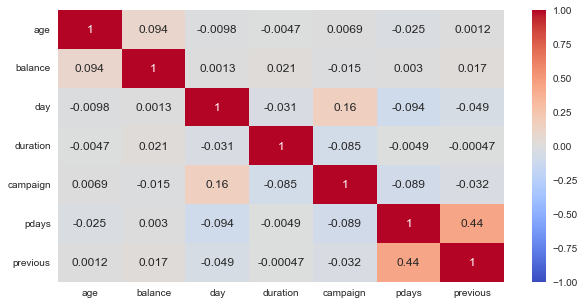

In [15]:
# Correlation - Pearson
fig = plt.figure(figsize = (10,5))
sns.heatmap(pd.concat([X_train, y_train], axis = 1).corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

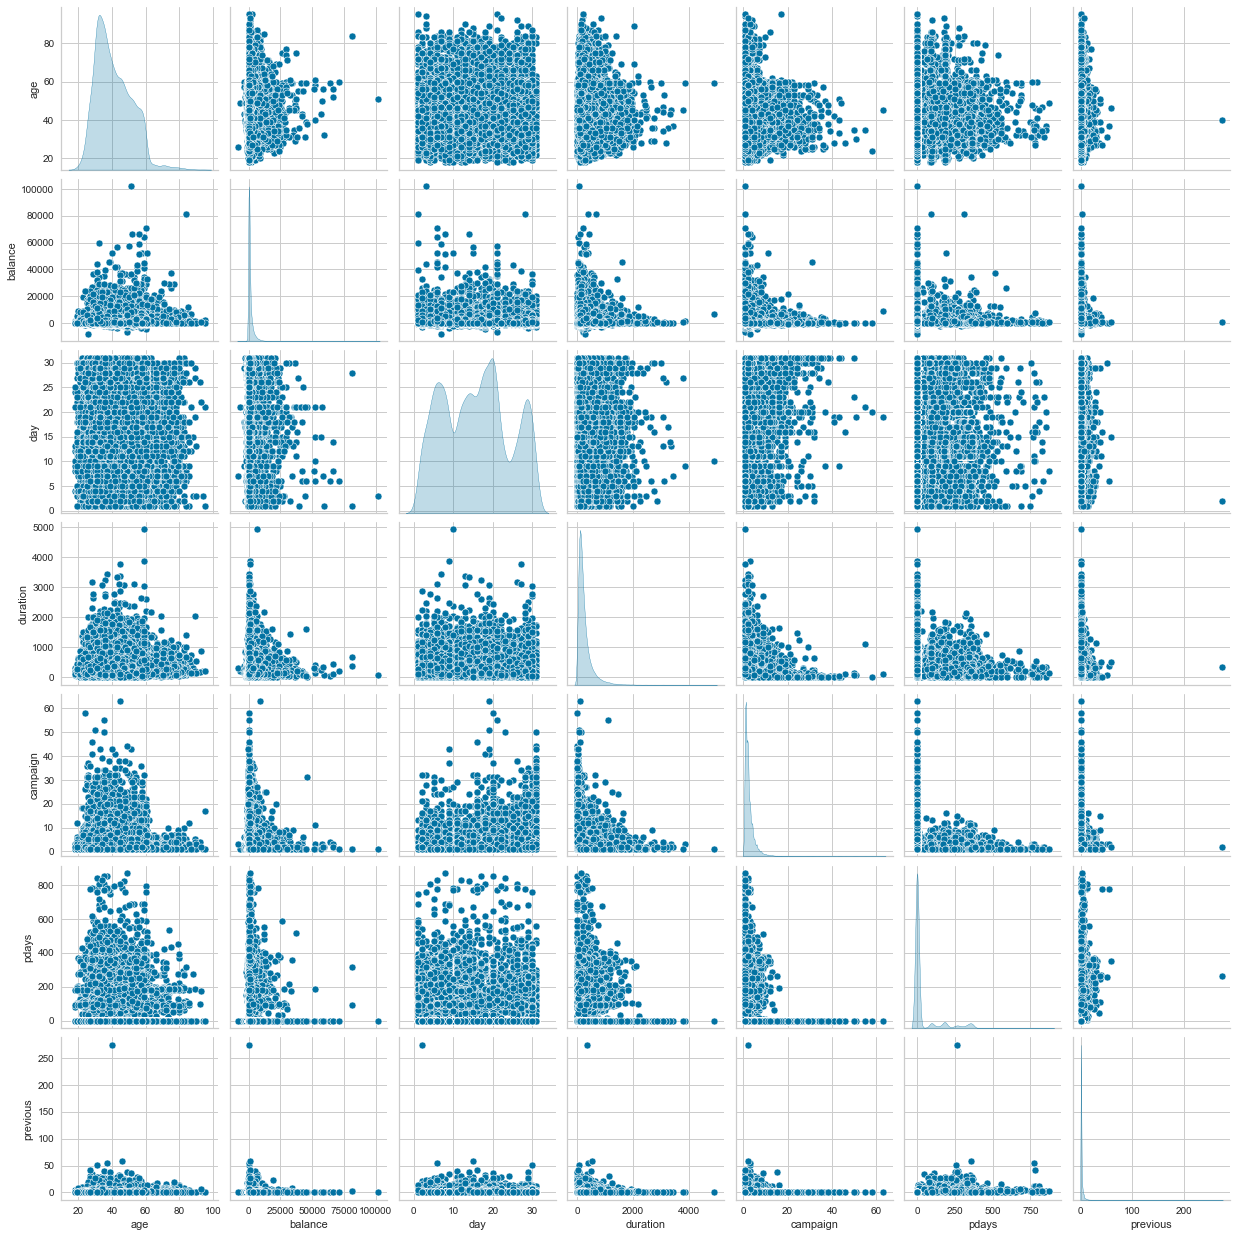

In [16]:
sns.pairplot(X_train, diag_kind = 'kde');

##### Feature relationship with target variable

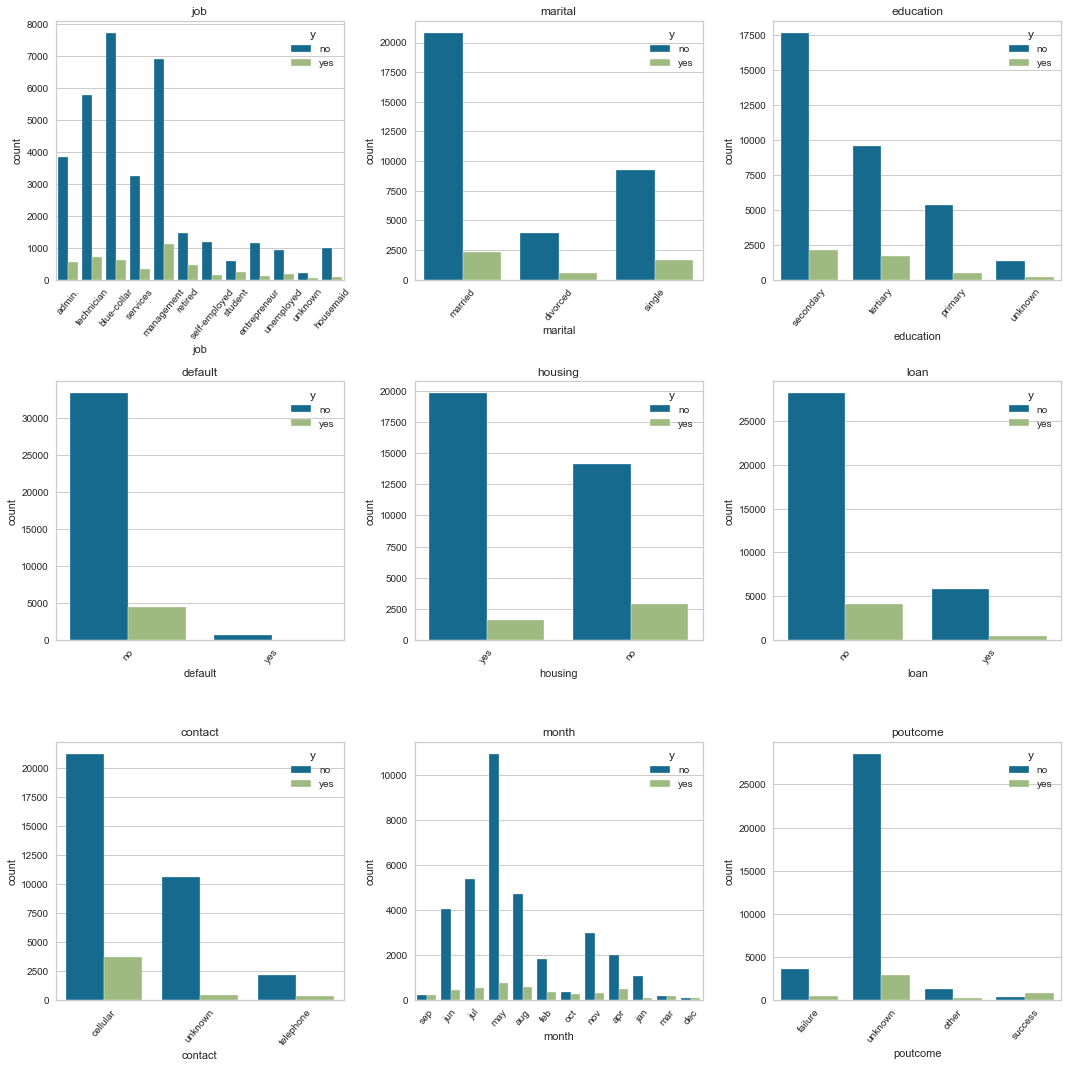

In [19]:
# For categorical data, we can use countplot and set hue to y to see if target variable distribution varies across classes
index = 1
plt.subplots(figsize = (15,15))

for col in X_train.select_dtypes('O').columns:
    ax = plt.subplot(3,3,index)
    sns.countplot(data = df_train, x = col, hue = 'y')
    ax.title.set_text(col)
    plt.xticks(rotation = 50)
    index += 1

plt.tight_layout()
plt.show();    

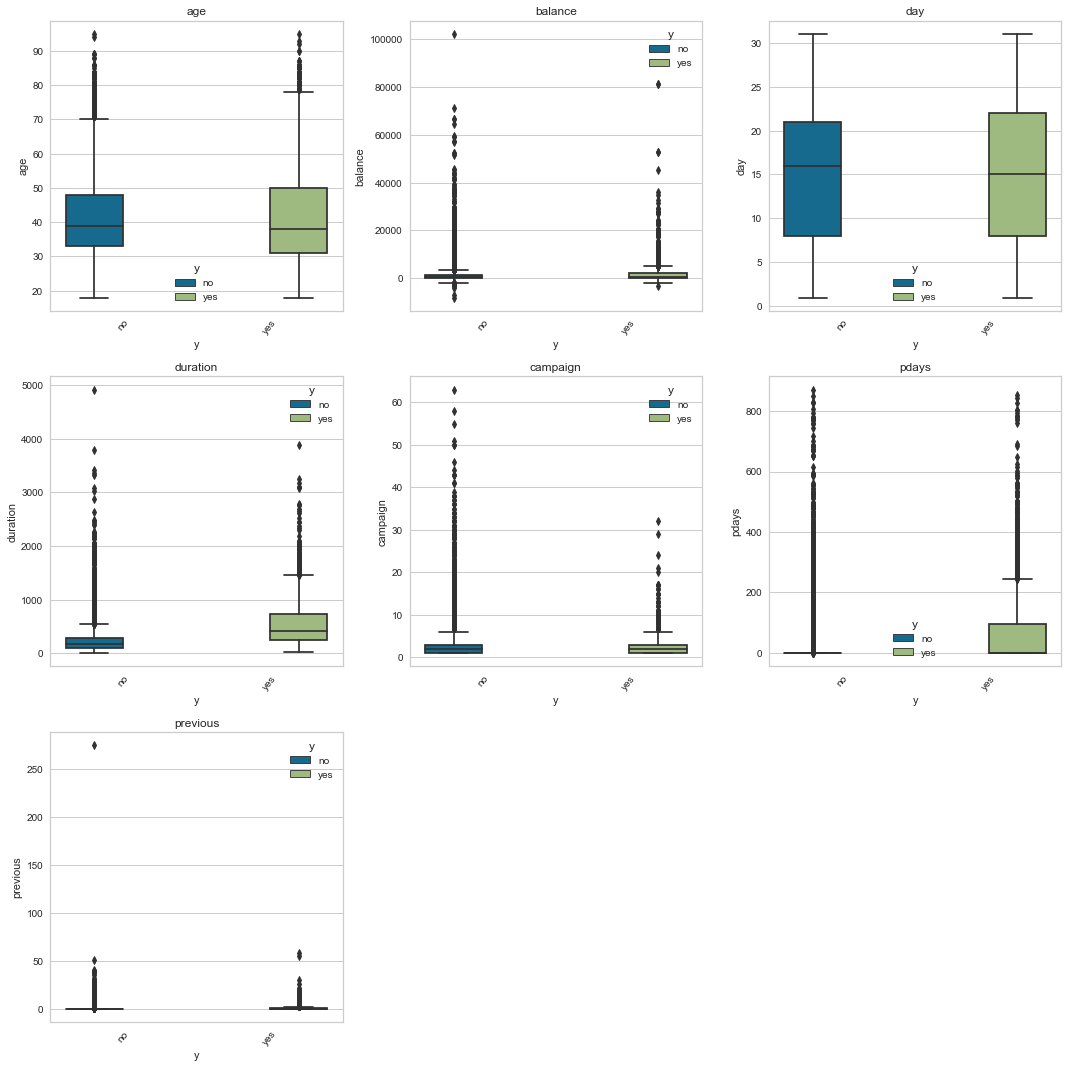

In [21]:
# For numerical data, we can use boxplots to see if the target variable classes are associated with different range of values for the numerical features
index = 1
plt.subplots(figsize = (15,15))

for col in df_train.select_dtypes(np.number).columns:
    ax = plt.subplot(3,3,index)
    sns.boxplot(data = df_train, x = 'y', y = col, hue = 'y')
    ax.title.set_text(col)
    plt.xticks(rotation = 50)
    index += 1

plt.tight_layout()
plt.show();    

##### More detailed feature explorations
- Previous analyses have revealed the basic patterns in the data features.
- We will now explore each of the features of interest in greater detail.

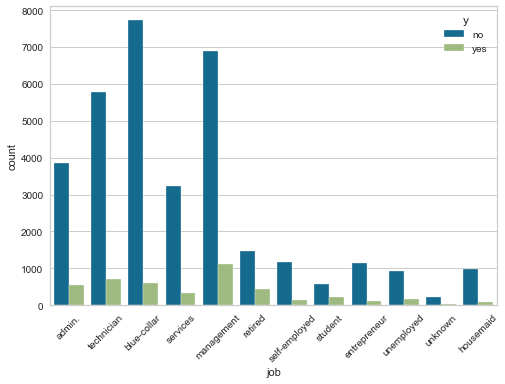

In [17]:
# Exploring "job" vs target
sns.countplot(data = df_train, x = 'job', hue = 'y')
plt.xticks(rotation = 45);

<AxesSubplot:xlabel='job,y'>

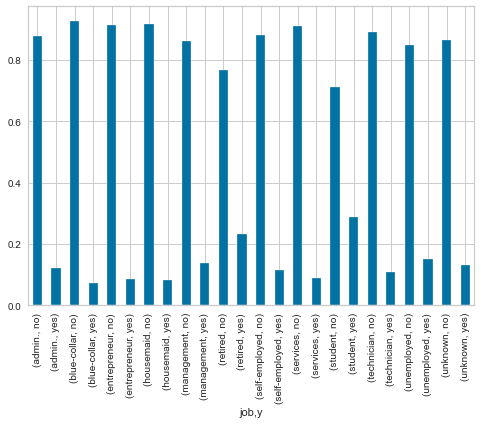

In [42]:
df_train.groupby('job')['y'].value_counts(normalize = True).plot(kind = 'bar')
# Clearly, some 'jobs' have higher success rate than others, such as 'retired', 'student', 'management', 'admin' and 'unemployed'.

##### Will it be benefitical to group similar job classes together?
- This will reduce rare class problems, and
- Reduce the total number of classes, which may speed up training

In [22]:
# student + retired + unemployed = not working
# admin + management = office job
# self-employeed + entrepreneur = self-employed
# blue-coller + housemaid + services  + technician = non-office jobs
# unknown

# Let df_train2 be the new data set with jobs featured
df_train2 = df_train.copy()

df_train2.job.replace({'admin.':'office_job', 'management':'office_job', 
                       'student':'not_working', 'retired':'not_working','unemployed':'not_working',
                       'blue-collar':'non-office', 'housemaid':'non-office', 'services':'non-office','technician':'non-office',
                       'entrepreneur':'self-employed'}, inplace = True)

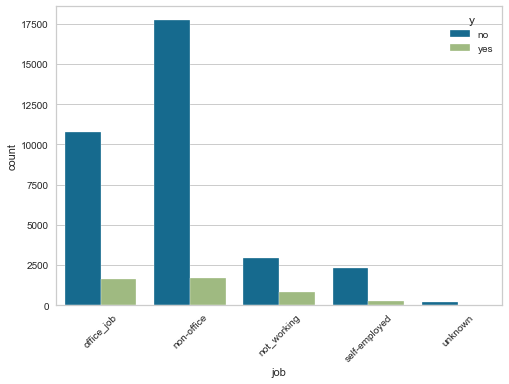

In [23]:
sns.countplot(data = df_train2, x = 'job', hue = 'y')
plt.xticks(rotation = 45);

<AxesSubplot:xlabel='job,y'>

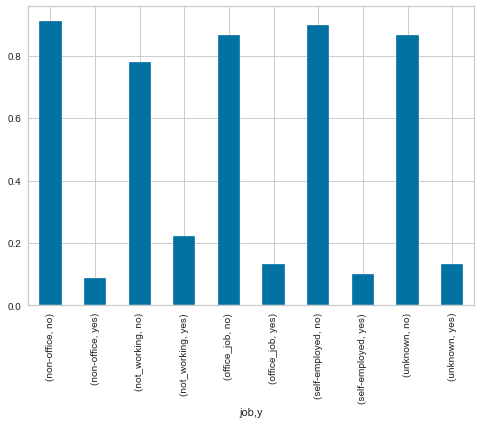

In [24]:
df_train2.groupby('job')['y'].value_counts(normalize = True).plot(kind = 'bar')

##### Will it be benefitical to discretize age or simply drop age?
- Based on the violinplot, we can see that there is not a huge difference in distribution between the 'yes' and 'no' target classes. We will try dropping age to see if that improves model performance.

<AxesSubplot:xlabel='age', ylabel='y'>

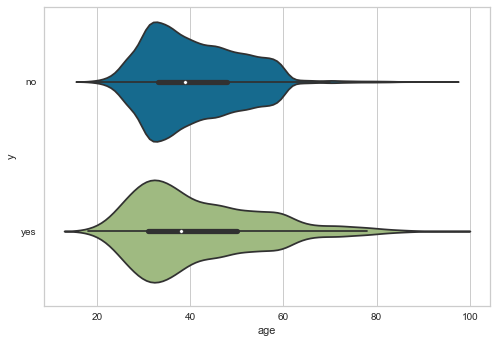

In [25]:
# See if age distribution is related to term deposit success
sns.violinplot(data = df_train, x = 'age', y = 'y') 

##### Will it be beneficial to group together single and divorced (which are both similar AND rarer classes in marital)?
- We can see that both single and divorced indeed have higher success rates than married.

<AxesSubplot:xlabel='marital', ylabel='count'>

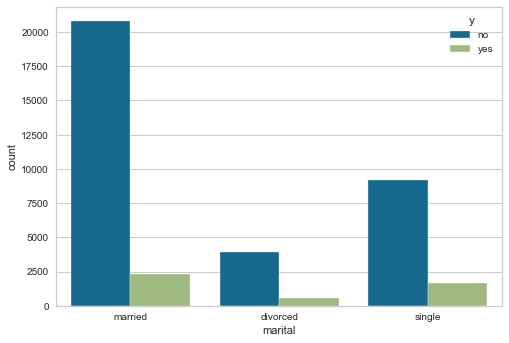

In [26]:
# Exploring marital
sns.countplot(data = df_train, x = 'marital', hue = 'y')

<AxesSubplot:xlabel='marital,y'>

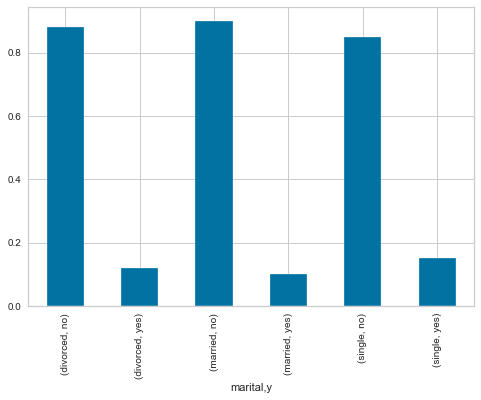

In [27]:
df_train.groupby('marital')['y'].value_counts(normalize = True).plot(kind = 'bar')

##### Will it be benefitical to group together some of the education classes?

<AxesSubplot:xlabel='education', ylabel='count'>

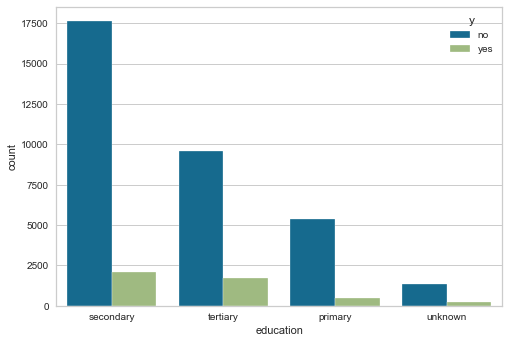

In [65]:
sns.countplot(data = df_train, x = 'education', hue = 'y')

<AxesSubplot:xlabel='education,y'>

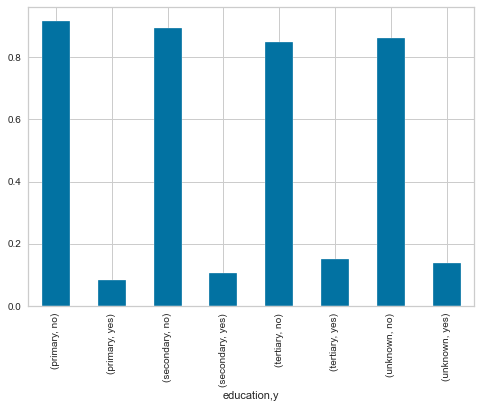

In [64]:
df_train.groupby('education')['y'].value_counts(normalize = True).plot(kind = 'bar')

In [67]:
# Combine primary and secondary to create = below tertiary, for example
# df_train5 = df_train.copy()
# df_train5.education.replace({'primary':'below_tertiary', 'secondary':'below_teriary'}, inplace = True)

##### Will it be benefitical to discretize balance or simply drop it?
- Based on the violinplots (even after dropping outliers), we can see that there is not a huge difference in distribution between the 'yes' and 'no' target classes. We will try dropping balance to see if that improves model performance.

<AxesSubplot:xlabel='balance', ylabel='y'>

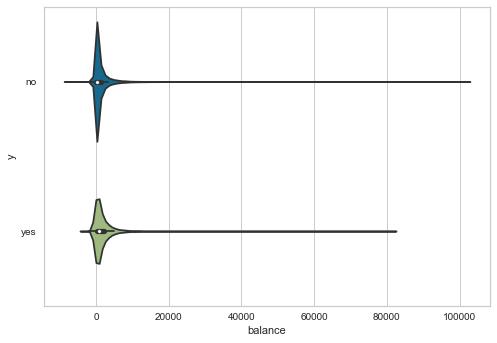

In [28]:
# Exploring balance
# Try discretization
# First see how age distribution relates to term deposit success
sns.violinplot(data = df_train, x = 'balance', y = 'y') 
# A lot of outliers, could be problematic; we can see the 90th quantile is 3570, yet the values are going up to 20000+

In [29]:
for perc in range(0,11):
    print(f'The {perc*10}th percentile value is {df_train.balance.quantile(perc/10)}')

The 0th percentile value is -8019.0
The 10th percentile value is 0.0
The 20th percentile value is 22.0
The 30th percentile value is 131.0
The 40th percentile value is 272.0
The 50th percentile value is 450.0
The 60th percentile value is 703.0
The 70th percentile value is 1126.0
The 80th percentile value is 1867.4000000000015
The 90th percentile value is 3570.0
The 100th percentile value is 102127.0


<AxesSubplot:xlabel='balance', ylabel='y'>

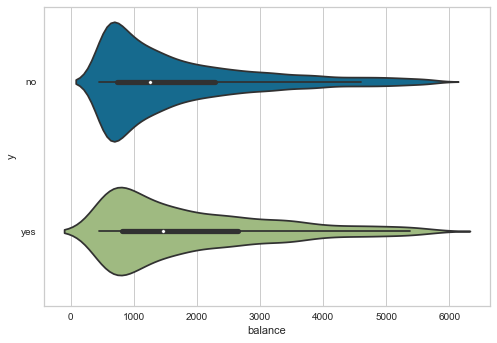

In [30]:
perc_95 = df_train.balance.quantile(0.95)
perc_5 = df_train.balance.quantile(0.5)

sns.violinplot(data = df_train[(df_train.balance < perc_95) & (df_train.balance > perc_5)], x = 'balance', y = 'y') 
# Although we can see that those with 'yes' have a slightly higher median balance, and a greater proportion have slightly higher balance (fatter
# on the right), whereas those with 'no' are slightly fatter on the left, the overall difference in distribution is not very pronounced, suggesting
# that we might be able to drop balance without negatively affective model performance.

In [86]:
# Two possible approaches
# 1. Drop balance
# df_train7_drop = df_train.drop('balance', axis = 1)

# 2. Impute the outliers with perc_5 and perc_95
# df_train7_impute = df_train.copy()
# df_train7_impute.balance[df_train7_impute.balance > perc_95] = perc_95
# df_train7_impute.balance[df_train7_impute.balance < perc_5] = perc_5 
# The problem is this changes the distribution, as we can see

<AxesSubplot:xlabel='balance', ylabel='y'>

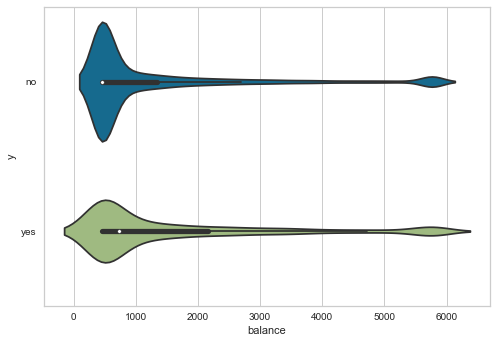

In [87]:
sns.violinplot(data = df_train7_impute, x = 'balance', y = 'y') 
# We can see the second approach changes the data distribution

##### Exploring day, month and duration

<AxesSubplot:xlabel='day', ylabel='count'>

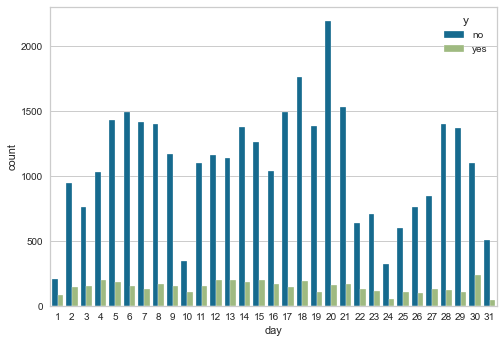

In [99]:
sns.countplot(data = df_train, x = 'day', hue = 'y')

<AxesSubplot:xlabel='day,y'>

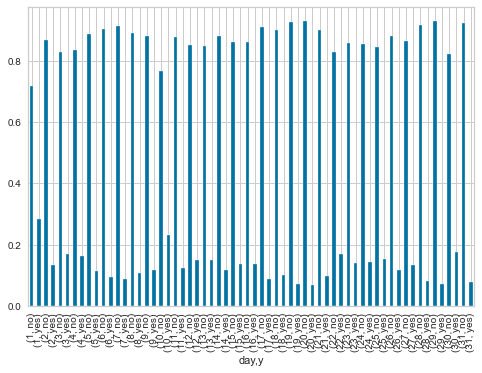

In [101]:
df_train.groupby('day')['y'].value_counts(normalize = True).plot(kind = 'bar')
# Definitely a noticeable difference between days, but is this due to chance or due to some underlying factor?

<AxesSubplot:xlabel='month', ylabel='count'>

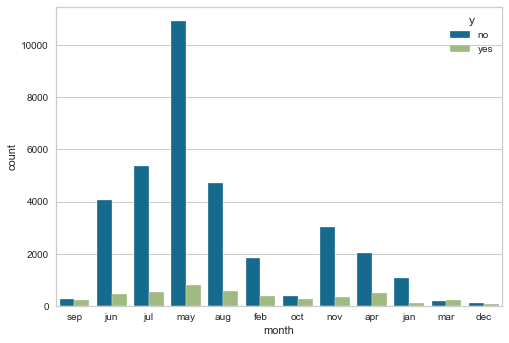

In [102]:
sns.countplot(data = df_train, x = 'month', hue = 'y')

<AxesSubplot:xlabel='month,y'>

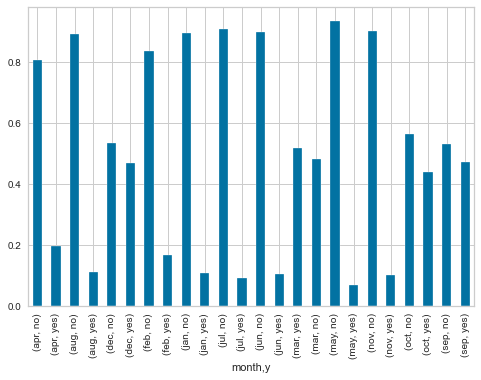

In [103]:
df_train.groupby('month')['y'].value_counts(normalize = True).plot(kind = 'bar')
# may-jul have low success rate, but high absolute numbers
# march, oct, dec, sept have very high success rates, but low absolute numbers

In [105]:
df_train.groupby('month')['pdays'].mean()

month
apr    93.82
aug    13.13
dec   103.55
feb    69.00
jan    68.40
jul     7.90
jun     9.13
mar    69.97
may    52.41
nov    42.59
oct    86.14
sep   114.04
Name: pdays, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='y'>

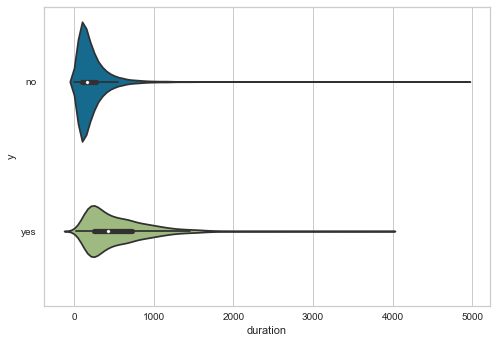

In [106]:
sns.violinplot(data = df_train, x = 'duration', y = 'y') 

In [108]:
for perc in range(0,11):
    print(f'The {perc*10}th percentile value is {df_train.duration.quantile(perc/10)}')

The 0th percentile value is 0.0
The 10th percentile value is 58.0
The 20th percentile value is 89.0
The 30th percentile value is 117.0
The 40th percentile value is 147.0
The 50th percentile value is 180.0
The 60th percentile value is 223.0
The 70th percentile value is 279.0
The 80th percentile value is 367.0
The 90th percentile value is 548.0
The 100th percentile value is 4918.0


<AxesSubplot:xlabel='duration', ylabel='y'>

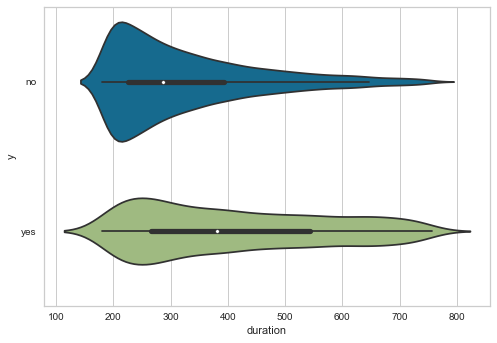

In [111]:
perc_95 = df_train.duration.quantile(0.95)
perc_5 = df_train.duration.quantile(0.5)

sns.violinplot(data = df_train[(df_train.duration < perc_95) & (df_train.duration > perc_5)], x = 'duration', y = 'y') 
# We can see there's a clear difference in distribution


<AxesSubplot:xlabel='duration', ylabel='y'>

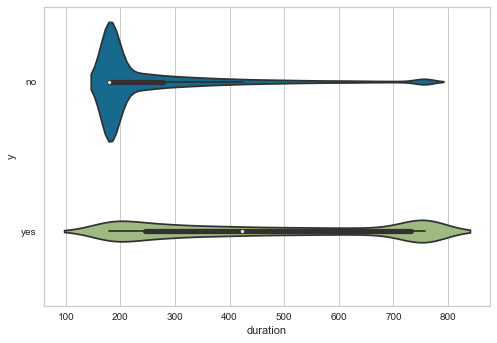

In [112]:
# Impute the outliers with perc_5 and perc_95
df_train10 = df_train.copy()
df_train10.duration[df_train10.duration > perc_95] = perc_95
df_train10.duration[df_train10.duration < perc_5] = perc_5 

sns.violinplot(data = df_train10, x = 'duration', y = 'y') 
# This does change our distribution

<AxesSubplot:xlabel='previous', ylabel='y'>

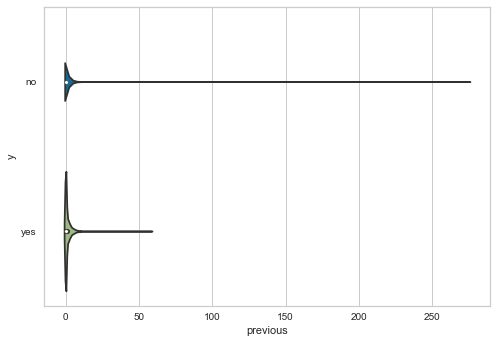

In [116]:
sns.violinplot(data = df_train, x = 'previous', y = 'y') 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

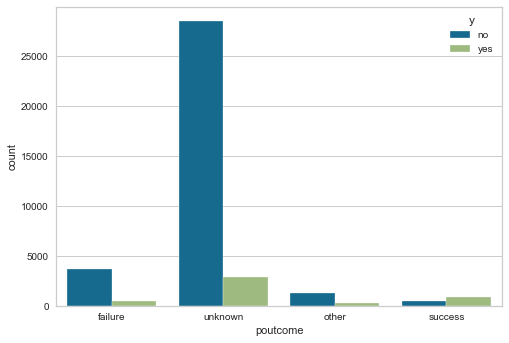

In [117]:
sns.countplot(data = df_train, x = 'poutcome', hue = 'y')

<AxesSubplot:xlabel='poutcome,y'>

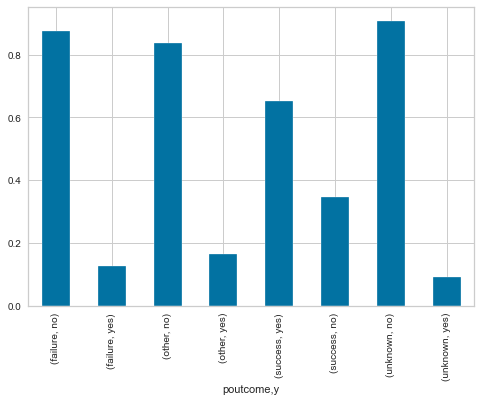

In [118]:
df_train.groupby('poutcome')['y'].value_counts(normalize = True).plot(kind = 'bar')

(array([3.6453e+04, 1.3880e+03, 3.4300e+02, 1.4100e+02, 6.4000e+01,
        2.6000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

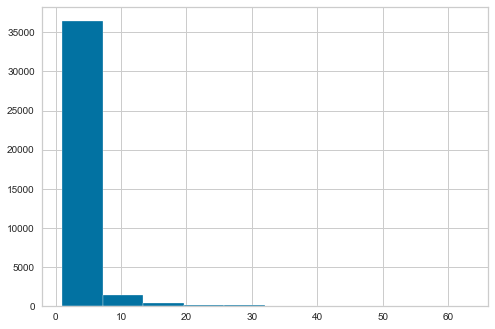

In [123]:
plt.hist(df_train.campaign);

##### Will it be benefitical to scale and transform the numerical variables?
- As we demonstrate below, feature scaling and transformation do help fixing bad numerical feature distributions.
- The original campaign variable was highly skewed, and the scaled and transformed campaign has a much nicer distribution (although still not gaussian) and scale. These manipulation will benefit certain algorithms such as Linear Regression, and algorithms that use gradient descent.

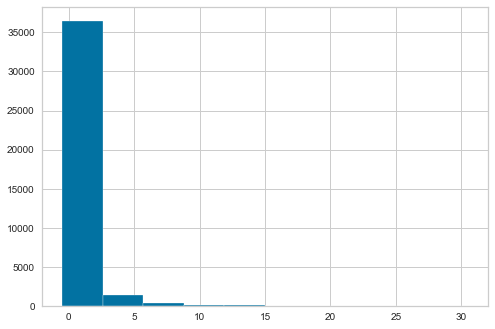

In [32]:
rs = RobustScaler()
df_train['campaign_scaled'] = rs.fit_transform(df_train['campaign'].values.reshape(-1,1))
plt.hist(df_train.campaign_scaled);

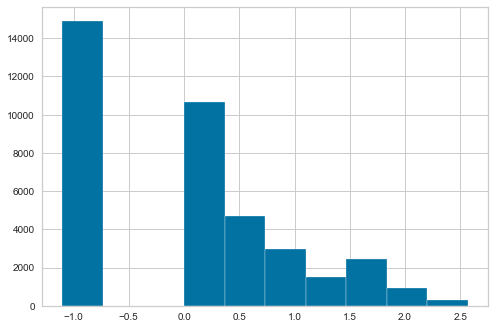

In [33]:
transformer = PowerTransformer()
df_train['campaign_scaled'] = transformer.fit_transform(df_train.campaign_scaled.values.reshape(-1,1))
plt.hist(df_train.campaign_scaled) 
df_train.drop('campaign_scaled', axis = 1, inplace = True); 

### 4. Baseline Modelling

We will first establish a solid baseline model. A baseline model is the basis for evaluating the effectiveness of various feature engineering and feature scaling/transformation approaches we have proprosed in previous sections.

In [35]:
# Raw Baseline Model
classification = pyclass.setup(df_train, target = 'y', 
                               normalize = False,
                              transformation = False,
                              fix_imbalance = False) # Default settings; 10-fold cross-validation; no cleaning
baseline_raw = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9064,0.9357,0.4879,0.6376,0.5522,0.5010,0.5069,0.2190
gbc,Gradient Boosting Classifier,0.9049,0.9261,0.4121,0.6579,0.5065,0.4569,0.4724,2.0160
rf,Random Forest Classifier,0.9022,0.9274,0.3707,0.6556,0.4731,0.4238,0.4450,1.2990
lda,Linear Discriminant Analysis,0.8994,0.9092,0.4396,0.6048,0.5086,0.4542,0.4617,0.1940
ridge,Ridge Classifier,0.8992,0.0000,0.2879,0.6761,0.4035,0.3581,0.3975,0.0350
lr,Logistic Regression,0.8990,0.9043,0.3443,0.6367,0.4464,0.3963,0.4193,2.3660
ada,Ada Boost Classifier,0.8984,0.9121,0.3851,0.6159,0.4735,0.4206,0.4350,0.5740
et,Extra Trees Classifier,0.8960,0.9070,0.3249,0.6167,0.4253,0.3742,0.3976,1.3090
dummy,Dummy Classifier,0.8814,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250
knn,K Neighbors Classifier,0.8783,0.7640,0.2612,0.4769,0.3373,0.2766,0.2919,0.3520


In [36]:
# Each of the cleaning/transformation steps were carried out iteratively to compare performance, 
# but for simplicity, we only included the final cleaning steps here:
# normalization using robust scaler, transformation using power transformer - yeo johnson method, and imbalance learning method - SMOTE.

classification = pyclass.setup(df_train, target = 'y', 
                                         normalize = True, normalize_method = 'robust',
                                        transformation = True, transformation_method = 'yeo-johnson',
                                        fix_imbalance = True)

baseline_clean = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9029,0.9330,0.6327,0.5769,0.6033,0.5481,0.5490,0.7240
rf,Random Forest Classifier,0.8999,0.9268,0.5619,0.5723,0.5668,0.5102,0.5104,2.9860
et,Extra Trees Classifier,0.8964,0.9156,0.4442,0.5724,0.4999,0.4431,0.4477,3.2420
dummy,Dummy Classifier,0.8834,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2840
gbc,Gradient Boosting Classifier,0.8775,0.9212,0.7653,0.4843,0.5931,0.5253,0.5444,4.5200
ada,Ada Boost Classifier,0.8717,0.8999,0.6996,0.4667,0.5598,0.4882,0.5020,1.4040
dt,Decision Tree Classifier,0.8694,0.7260,0.5389,0.4502,0.4904,0.4163,0.4186,0.5640
nb,Naive Bayes,0.8298,0.7881,0.5663,0.3557,0.4368,0.3427,0.3557,0.3430
lr,Logistic Regression,0.8293,0.9092,0.8377,0.3922,0.5341,0.4461,0.4943,0.7510
knn,K Neighbors Classifier,0.8248,0.8438,0.7060,0.3690,0.4846,0.3913,0.4213,3.5770


### 5. Feature Engineering and Modelling

##### Testing individual feature engineering's effect on performance

In [51]:
# Testing job engineering
# classification = pyclass.setup(df_train2, target = 'y', 
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9068,0.9338,0.4937,0.6333,0.5540,0.5029,0.5082,0.5530
gbc,Gradient Boosting Classifier,0.9050,0.9238,0.5158,0.6147,0.5605,0.5078,0.5104,6.0210
rf,Random Forest Classifier,0.9036,0.9233,0.4039,0.6450,0.4959,0.4458,0.4612,2.1210
ada,Ada Boost Classifier,0.8970,0.9009,0.4756,0.5751,0.5203,0.4632,0.4660,1.2930
et,Extra Trees Classifier,0.8970,0.9099,0.3925,0.5941,0.4721,0.4177,0.4290,3.5420
dummy,Dummy Classifier,0.8825,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0840
dt,Decision Tree Classifier,0.8724,0.7079,0.4927,0.4602,0.4758,0.4032,0.4036,0.2140
lda,Linear Discriminant Analysis,0.8586,0.9034,0.7770,0.4423,0.5637,0.4868,0.5144,0.3650
ridge,Ridge Classifier,0.8585,0.0000,0.7767,0.4421,0.5634,0.4865,0.5141,0.0960
lr,Logistic Regression,0.8388,0.9035,0.8159,0.4076,0.5436,0.4587,0.4995,4.0600


In [56]:
# Testing dropping 'age'
# classification = pyclass.setup(df_train3, target = 'y',
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9080,0.9331,0.4986,0.6361,0.5584,0.5079,0.5129,0.5540
gbc,Gradient Boosting Classifier,0.9055,0.9241,0.5158,0.6137,0.5601,0.5076,0.5102,6.1130
rf,Random Forest Classifier,0.9017,0.9215,0.3852,0.6293,0.4776,0.4268,0.4426,2.3380
et,Extra Trees Classifier,0.8970,0.9054,0.3805,0.5925,0.4629,0.4090,0.4215,3.1970
ada,Ada Boost Classifier,0.8967,0.9031,0.4747,0.5694,0.5172,0.4600,0.4627,1.2600
dummy,Dummy Classifier,0.8832,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0830
dt,Decision Tree Classifier,0.8774,0.7155,0.5043,0.4764,0.4897,0.4202,0.4205,0.3550
ridge,Ridge Classifier,0.8561,0.0000,0.7768,0.4352,0.5578,0.4800,0.5088,0.1090
lda,Linear Discriminant Analysis,0.8561,0.9050,0.7768,0.4352,0.5578,0.4800,0.5088,0.4410
lr,Logistic Regression,0.8416,0.9071,0.8125,0.4101,0.5450,0.4615,0.5011,10.1330


In [63]:
# Testing divorce+single combined
# classification = pyclass.setup(df_train4, target = 'y', 
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9110,0.9377,0.5326,0.6445,0.5829,0.5336,0.5368,0.5050
gbc,Gradient Boosting Classifier,0.9060,0.9267,0.5348,0.6130,0.5706,0.5181,0.5200,5.9510
rf,Random Forest Classifier,0.9048,0.9266,0.4137,0.6451,0.5037,0.4539,0.4678,2.4200
et,Extra Trees Classifier,0.8998,0.9133,0.4006,0.6091,0.4828,0.4300,0.4419,2.7800
ada,Ada Boost Classifier,0.8975,0.9048,0.4989,0.5720,0.5324,0.4752,0.4769,1.6500
dummy,Dummy Classifier,0.8831,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0800
dt,Decision Tree Classifier,0.8799,0.7223,0.5167,0.4877,0.5016,0.4334,0.4337,0.2580
ridge,Ridge Classifier,0.8595,0.0000,0.7819,0.4430,0.5654,0.4892,0.5174,0.1110
lda,Linear Discriminant Analysis,0.8594,0.9086,0.7819,0.4429,0.5653,0.4891,0.5173,0.3380
lr,Logistic Regression,0.8422,0.9083,0.8105,0.4117,0.5459,0.4625,0.5015,4.4290


In [68]:
# Testing education combined
# classification = pyclass.setup(df_train5, target = 'y',
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9105,0.9337,0.5094,0.6470,0.5692,0.5201,0.5252,0.5280
gbc,Gradient Boosting Classifier,0.9069,0.9247,0.5293,0.6168,0.5690,0.5172,0.5195,5.7000
rf,Random Forest Classifier,0.9035,0.9243,0.3821,0.6440,0.4790,0.4297,0.4478,2.2020
et,Extra Trees Classifier,0.8987,0.9110,0.3828,0.6014,0.4675,0.4146,0.4277,2.9270
ada,Ada Boost Classifier,0.8985,0.9032,0.4794,0.5772,0.5232,0.4670,0.4698,1.3460
dummy,Dummy Classifier,0.8838,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0820
dt,Decision Tree Classifier,0.8760,0.7091,0.4915,0.4681,0.4793,0.4090,0.4093,0.2680
ridge,Ridge Classifier,0.8604,0.0000,0.7806,0.4430,0.5652,0.4895,0.5174,0.1050
lda,Linear Discriminant Analysis,0.8604,0.9072,0.7806,0.4431,0.5653,0.4896,0.5175,0.3670
lr,Logistic Regression,0.8403,0.9061,0.8180,0.4072,0.5437,0.4598,0.5010,3.4280


In [88]:
# Dropping balance
# classification = pyclass.setup(df_train7_drop, target = 'y', 
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9076,0.9341,0.5173,0.6400,0.5719,0.5207,0.5246,0.5280
gbc,Gradient Boosting Classifier,0.9037,0.9233,0.5388,0.6090,0.5716,0.5176,0.5189,6.2830
rf,Random Forest Classifier,0.9023,0.9217,0.4162,0.6394,0.5040,0.4525,0.4655,2.6820
ada,Ada Boost Classifier,0.8960,0.9015,0.4902,0.5747,0.5288,0.4708,0.4729,1.5770
et,Extra Trees Classifier,0.8951,0.9056,0.3950,0.5898,0.4730,0.4172,0.4277,3.8780
dummy,Dummy Classifier,0.8809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1180
dt,Decision Tree Classifier,0.8748,0.7120,0.4983,0.4767,0.4868,0.4156,0.4160,0.3710
ridge,Ridge Classifier,0.8578,0.0000,0.7750,0.4450,0.5653,0.4877,0.5146,0.1640
lda,Linear Discriminant Analysis,0.8578,0.9043,0.7747,0.4450,0.5652,0.4876,0.5145,0.4270
lr,Logistic Regression,0.8502,0.9087,0.8078,0.4316,0.5625,0.4820,0.5166,7.1720


In [89]:
# Imputing balance
# classification = pyclass.setup(df_train7_impute, target = 'y',
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9083,0.9349,0.5109,0.6386,0.5672,0.5167,0.5209,0.5920
gbc,Gradient Boosting Classifier,0.9053,0.9257,0.5418,0.6113,0.5736,0.5207,0.5223,7.3260
rf,Random Forest Classifier,0.9020,0.9262,0.3986,0.6353,0.4894,0.4383,0.4532,2.3640
et,Extra Trees Classifier,0.8966,0.9115,0.3724,0.5989,0.4589,0.4052,0.4194,4.0930
ada,Ada Boost Classifier,0.8952,0.9019,0.4743,0.5670,0.5160,0.4579,0.4604,1.5700
dummy,Dummy Classifier,0.8821,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1250
dt,Decision Tree Classifier,0.8764,0.7141,0.5017,0.4772,0.4887,0.4185,0.4189,0.2830
ridge,Ridge Classifier,0.8587,0.0000,0.7755,0.4434,0.5640,0.4871,0.5144,0.1120
lda,Linear Discriminant Analysis,0.8587,0.9061,0.7755,0.4435,0.5641,0.4872,0.5144,0.4500
lr,Logistic Regression,0.8432,0.9088,0.8149,0.4159,0.5506,0.4675,0.5065,4.0700


In [94]:
# Indebtedness
# classification = pyclass.setup(df_train8, target = 'y', 
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9086,0.9342,0.5122,0.6349,0.5665,0.5161,0.5201,0.5670
gbc,Gradient Boosting Classifier,0.9054,0.9245,0.5345,0.6079,0.5686,0.5158,0.5173,5.8810
rf,Random Forest Classifier,0.9036,0.9251,0.4149,0.6341,0.5011,0.4504,0.4631,2.3570
et,Extra Trees Classifier,0.8995,0.9123,0.3859,0.6113,0.4727,0.4203,0.4342,3.0970
ada,Ada Boost Classifier,0.8952,0.9017,0.4741,0.5605,0.5135,0.4552,0.4573,1.3480
dummy,Dummy Classifier,0.8832,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0900
dt,Decision Tree Classifier,0.8754,0.7101,0.4944,0.4686,0.4810,0.4103,0.4106,0.2610
ridge,Ridge Classifier,0.8581,0.0000,0.7776,0.4397,0.5616,0.4847,0.5128,0.1110
lda,Linear Discriminant Analysis,0.8581,0.9049,0.7776,0.4397,0.5616,0.4847,0.5128,0.3860
lr,Logistic Regression,0.8423,0.9057,0.8110,0.4115,0.5458,0.4625,0.5016,4.9930


In [113]:
# Duration
# classification = pyclass.setup(df_train10, target = 'y', 
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)
# best_model = pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9074,0.9317,0.4974,0.6229,0.5526,0.5017,0.5059,0.5280
gbc,Gradient Boosting Classifier,0.9065,0.9216,0.5245,0.6095,0.5634,0.5114,0.5134,6.3560
rf,Random Forest Classifier,0.9029,0.9228,0.3812,0.6297,0.4745,0.4246,0.4411,2.2180
et,Extra Trees Classifier,0.8994,0.9154,0.4361,0.5848,0.4992,0.4447,0.4508,2.6470
ada,Ada Boost Classifier,0.8950,0.8991,0.4722,0.5511,0.5084,0.4500,0.4518,1.3410
dummy,Dummy Classifier,0.8848,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0810
dt,Decision Tree Classifier,0.8782,0.7113,0.4945,0.4726,0.4830,0.4141,0.4143,0.2530
ridge,Ridge Classifier,0.8494,0.0000,0.7970,0.4192,0.5494,0.4692,0.5043,0.1060
lda,Linear Discriminant Analysis,0.8494,0.9059,0.7970,0.4192,0.5494,0.4692,0.5043,0.3670
lr,Logistic Regression,0.8382,0.9025,0.8189,0.4011,0.5384,0.4539,0.4966,3.8130


##### Selecting the right feature engineering approaches
In the previous section, we looked at how each engineered feature independently affected model performance, but how will these features interact, and which of these engineered features should we select for the final model?

We will apply an iterative forward-selection strategy to choose the right feature engineering approaches. We will start by taking the most "informative" approach, that is the engineered feature that independently improved model performance by the most amount. We will tend add the second most "informative" approach to our model...we will repeat this process and discard approaches that result in a decrease in performance.

In [112]:
df_train_new = df_train.copy()
# Now let's combine the previous steps 1 by 1
# Should start with the engineering that lead to most improvement
# Step 1: Dropping Balance - Significantly improved from baseline
df_train_new.drop('balance', axis = 1, inplace = True)

# 1. LightGradientBoosting F1:0.6077
# 2. Gradient Boosting Classifier F1:0.5914

In [86]:
# Step 2: Engineering (Combining) - improved slightly
#df_train_new.job.replace({'admin.':'office job', 'management':'office job', 
#                       'student':'not working', 'retired':'not working','unemployed':'not working',
#                       'blue-collar':'non-office', 'housemaid':'non-office', 'services':'non-office','technician':'non-office',
#                       'entrepreneur':'self-employed'}, inplace = True)

# 1. LightGradientBoosting F1:0.6074
# 2. Gradient Boosting Classifier F1:0.5882

In [113]:
# Step 3: Dropping Age - worsened
df_train_new.drop('age', axis = 1, inplace = True)
# 1. LightGradientBoosting F1:0.6082
# 2. Gradient Boosting Classifier F1:0.5884

In [114]:
# Step 3: Divorce & Single combined - Okay, improves LGBM but worsens gbc
# Change divorced to single
df_train_new.marital.replace({'divorced':'single'}, inplace = True)
# 1. LightGradientBoosting F1:0.6135
# 2. Gradient Boosting Classifier F1:0.5856

In [89]:
# Step 4: Combining Education
# Combine primary and secondary to create = below tertiary
# df_train_new.education.replace({'primary':'below_tertiary', 'secondary':'below_teriary'}, inplace = True)

# 1. LightGradientBoosting F1:0.6066
# 2. Gradient Boosting Classifier F1:0.5813

In [90]:
# Step 5: Dropping Default - worsened
# df_train_new.drop('default', axis = 1, inplace = True)
# 1. LightGradientBoosting F1:0.6091
# 2. Gradient Boosting Classifier F1:0.5828

In [91]:
# Step 6: Introducing indebtedness - Worsened
# Adding an indebtedness variable
# Creating a new feature called "indebtedness"
# conditions = [df_train['housing'].eq('yes') & df_train['loan'].eq('yes'),    # yes to both loans (two loans)
#             df_train['housing'].eq('no') & df_train['loan'].eq('no')]      # no to both loans (no loan)  
#
#choices = ['two loans', 'no loan']

#df_train_new['indebtedness'] = np.select(conditions, choices, default = 'one loan')

In [121]:
# Used for testing the engineered features
# classification = pyclass.setup(df_train_new, target = 'y', 
#                                         normalize = True, normalize_method = 'robust',
#                                        transformation = True, transformation_method = 'yeo-johnson',
#                                        fix_imbalance = True)

# best_model = pyclass.compare_models(sort = 'F1', n_select = 1)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:51:35
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
job,Categorical
marital,Categorical
education,Categorical
default,Categorical
housing,Categorical
loan,Categorical
contact,Categorical
day,Numeric
month,Categorical
duration,Numeric


KeyboardInterrupt: Interrupted by user

##### Model Selection
- Applying the forward-selection strategy, our results suggest that we should drop "balance" and "age" from our features, and combine the divorce and single classes in the marital feature.
- Furthermore, Light Gradient Boosting algorithm seems to outperform all other models in terms of F1 Score. We will use Light Gradient Boosting for our final model training and hyperparameter tuning.

In [116]:
# Selected model and engineering approaches: Drop Balance + Drop Age + Marital combined
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4624, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 6. Final Model building and Hyperparameter Tuning

In [37]:
# Using full data
df_final = df.copy() 

# Step 1: Dropping balance
df_final.drop('balance', axis = 1, inplace = True)

# Step 2: Dropping age
df_final.drop('age', axis = 1, inplace = True)

# Step 3: Combining marital
df_final.marital.replace({'divorced':'single'}, inplace = True)

In [38]:
classification = pyclass.setup(df_final, target = 'y', train_size = 0.9,    #keeping 10% of data as test set
                                        normalize = True, normalize_method = 'robust',
                                        transformation = True, transformation_method = 'yeo-johnson',
                                        fix_imbalance = True)

best_model = pyclass.compare_models(sort = 'F1', n_select = 1, include = ['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9003,0.9316,0.6781,0.5588,0.6126,0.5560,0.5595,1.8770


In [39]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3217, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

##### Hyperparameter Tuning to further improve performance

In [40]:
tuned_best_model = pyclass.tune_model(best_model, 
                                      optimize = 'F1', 
                                      n_iter = 150, 
                                      choose_better = True )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8882,0.9327,0.7548,0.5129,0.6108,0.5482,0.5622
1,0.8946,0.9311,0.7336,0.5338,0.6180,0.5586,0.5681
2,0.8857,0.9261,0.7336,0.5058,0.5988,0.5348,0.5473
3,0.8865,0.9302,0.7378,0.5080,0.6017,0.5381,0.5509
4,0.8926,0.9285,0.7400,0.5271,0.6157,0.5553,0.5661
5,0.8978,0.9343,0.7526,0.5435,0.6312,0.5736,0.5839
6,0.8887,0.9249,0.7378,0.5147,0.6064,0.5440,0.5559
7,0.8997,0.9409,0.7780,0.5484,0.6434,0.5870,0.5992
8,0.8874,0.9342,0.7532,0.5115,0.6092,0.5463,0.5602
9,0.9002,0.9397,0.7674,0.5508,0.6413,0.5852,0.5960


In [41]:
tuned_best_model

LGBMClassifier(bagging_fraction=1.0, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=280, n_jobs=-1, num_leaves=200, objective=None,
               random_state=3217, reg_alpha=0.0005, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [130]:
pyclass.save_model(tuned_best_model, 'bank_marketing_bestmodel_fulldata')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.01,
                                 max_depth=-1, min_child_samples=1,
                                 min_child_weight=0

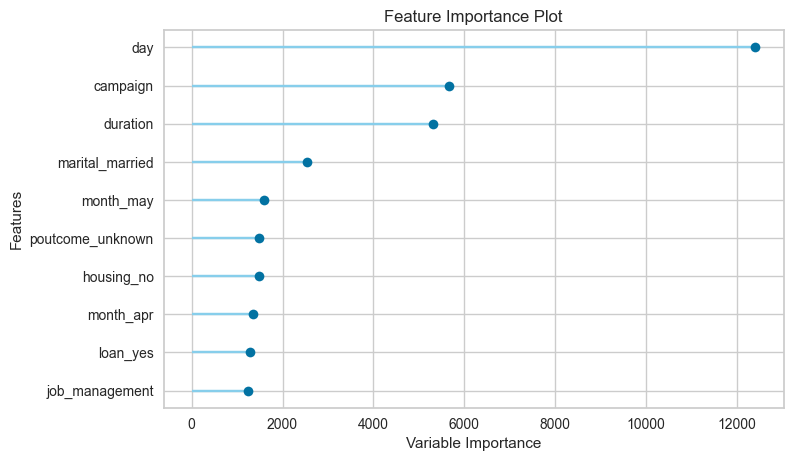

In [51]:
pyclass.plot_model(tuned_best_model, plot = 'feature')
# A particularly interesting observation is month_may and month_apr are among the most important features, this may be due to the fact
# that in Portugal, organizations pay their employees bonuses twice a year, once in Dec (Christmas) and once in June. Usually Dec payments
# are used on spending and celebrations, and it is likely that the bank starts contacting customers in April and May hoping to have
# these customers open a term deposit when they receive the bonus in June.

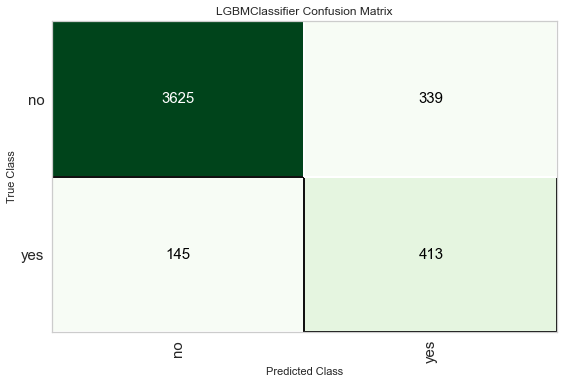

In [43]:
pyclass.plot_model(tuned_best_model, plot = 'confusion_matrix')

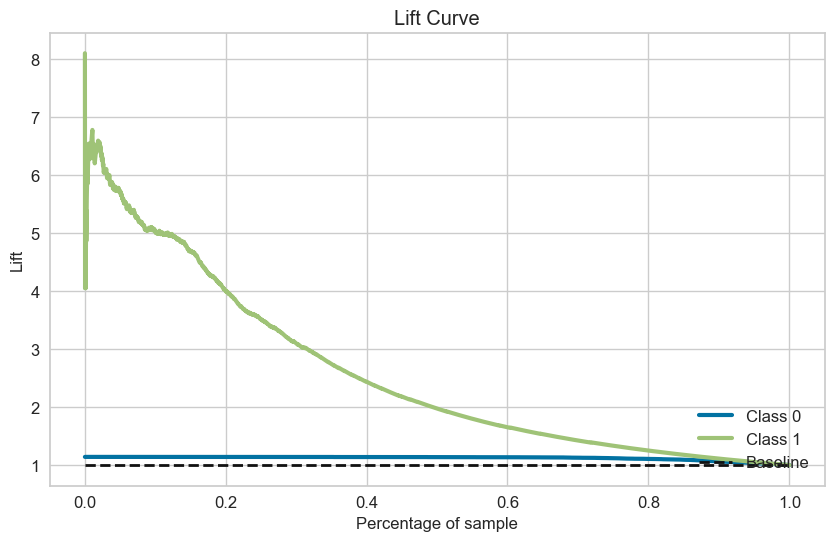

In [46]:
pyclass.plot_model(tuned_best_model, plot = 'lift')

In [48]:
pyclass.evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 7. Model Evaluation and Business Value

#### 7.1 Confusion Matrix
The confusion matrix above is calculated on the test set (4522 samples), and it is a summary of predicted results versus actual class labels. The confusion matrix can be used to calculate the test set precision and recall metrics.

$Precision = \frac{True Positives}{True Positives + False Positives} = \frac{413}{413+339} = 0.549$

$Recall = \frac{True Positives}{True Positives + False Negatives} = \frac{413}{413+145} = 0.740$



#### 7.2 Lift Chart
A lift chart visually represents the improvement a model provides when compared against results of not using a model (i.e. a random guess). From the lift chart above, we can see that at 10% (top 10% most likely customers) of the sample market, our model provides a performance gain (in terms of identifying successful term deposit customers) of 5 times when compared with not using the model. And at 20% of the sample market, our model provides a performance gain of 4 times when compared with not using the model. At 100% of the sample market, our model has no performance gain, because there are only so many customers that are willing to open term deposits, and even if we contact every single person in the market, we will not be able to convert any additional customers.


#### 7.3 Business Value of our model

##### Our model generates significant business values for the bank:
1. Vastly **improving efficiency and reducing wastes**:
    - At a precision of 0.549, approximately 55% of the customers who we predict to open a deposit, will actually open a deposit following the marketing campaign. This is a vast improvement from the 12% success rate when not using our model. This means sales staff can now concentrate only on the most likely customers and not waste time and resources on those who will not open a deposit anyway.
2. Potential to significantly **improve revenues** without increasing resource commitment:
    - As illustrated by the lift chart, and assuming the overall market is large enough, if the bank focuses primarily on the top 10% customers, it will be able to gain 5 times as many term deposit customers as before, without having to consume any additional resources. The exact increase in revenue will depend on the average value of these term deposits, nonetheless this still represents a great potential for improving revenues.
3. **Increasing profits and shareholder value**:
    - With a decrease in wastes and costs, and an increase the revenue, our model provides the bank a great opportunity for improving profits, earnings per share and shareholder value.

##### Quantitative illustration of the model's business value:

**Assumptions:**

- As a basis for comparison we will take the original data's sample size (45211 observations) as the bank's capacity for telemarketing, given current resources. In other words, the bank don't have resources to contact more than 45211 customers within the same timespan.
- We will also assume that the total market size is more than 450,000 customers. This seems like a reasonable assumption, as Portugal has a population of 10.31 million (2020). 
- We will also assume that the average total cost of telemarketing per customer is $200. 

- And the average total revenue per successful deposit (when turned into loans) is $2,000.
- The success rate in the raw data is 12%.

**Profits without model:**

$Total\space Costs = Number\space of\space customers\space contacted \space* \space Cost\space per \space customer = 45211 * 200 = \$9,042,200$

$Total \space Revenues = Success \space Rate \space * Number \space of \space customers \space contacted \space * \space Revenue \space per \space deposit = 12\% * 45211 * 2000 = \$10,850,640$

$Total \space Profits = Total \space Revenues \space - \space Total\space Costs = \$10,850,640 - \$9,042,200 = \$1,808,440 $

**Profits with our model:**

We will contact the top 10% most likely customers in the market: 450,000 * 10% = 45,000 customers.

The success rate at the top 10% is 5 times that of the baseline case: 5 * 12% = 60%.

$Total\space Costs = Number\space of\space customers\space contacted \space* \space Cost\space per \space customer = 45000 * 200 = \$9,000,000$

$Total \space Revenues = Success \space Rate \space * Number \space of \space customers \space contacted \space * \space Revenue \space per \space deposit = 60\% * 45000 * 2000 = \$54,253,200$

$Total \space Profits = Total \space Revenues \space - \space Total\space Costs = \$54,253,200 - \$9,000,000 = \$45,253,200 $

**The value of our model:**

$ Value = Profit\space with\space model\space -\space Profit\space without\space model = \$45,253,200 - \$1,808,440 = \$43,444,760$

We can see that our model provides tremendous value for the bank, increasing its profit by more than 40 million dollars, or 24 times. Our model more than satisfies the project's definition of success of having a success rate of 24%.

### 8. Limitations

A key limitation of our model's value rests on the assumption of a sufficient market size.

We have assumed that the total market is big enough, with pool of at least 450,000 customers. What if that's not true?

Assuming there are only 90,000 customers in total.

We will contact the top 50% most likely customers in the market: 90,000 * 50% = 45,000 customers.

The success rate at the top 50% (according to the lift chart) is twice that of the baseline case: 2 * 12% = 24%.

$Total\space Costs = Number\space of\space customers\space contacted \space* \space Cost\space per \space customer = 45000 * 200 = \$9,000,000$

$Total \space Revenues = Success \space Rate \space * Number \space of \space customers \space contacted \space * \space Revenue \space per \space deposit = 24\% * 45000 * 2000 = \$21,600,000$

$Total \space Profits = Total \space Revenues \space - \space Total\space Costs = \$21,600,000 - \$9,000,000 = \$12,600,000 $


**The value of our model:**

$ Value = Profit\space with\space model\space -\space Profit\space without\space model = \$12,600,000 - \$1,808,440 = \$10,791,560$

We can see that as the total market size decreases, the value of our model also decreases. In the extreme case where the total market size is exactly 45211 customers, our model will provide a value of 0, as model results converge with results without a model.

### 9. Conclusion

In this project we successfully built a classification model for predicting term deposit customers using data from a Portuguese bank. Through exploratory data analysis, feature engineering, iterative model training and hyperparameter tuning, we have been able to build a Light Gradient Boosting model that offers 5 times lift in success prediction performance at the top 10% sample size, and 4 times lift at the top 20% sample size, when compared with the term deposit success rate without using the model. Therefore, our model has the potential to significantly improve the efficiency, cost-effectiveness and profitability associated with the bank's term deposit marketing operations.